![Astrofisica Computacional](../logo.PNG)

---
## 01. Decision Trees


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we present decision trees as a tool to find the redshift of a set of galaxies.

---

## Decision Trees

We will use **decision trees** as a machine learning (ML) algorithm to determine the redshift of a galaxy from its photometric color indices. First, we will describe how this task would be done classically (i.e. without ML) to understand the possible limitations of the methods.



### The Dataset

The usual method to determine the redshift of a galaxy implies to obtain information of the emission lines (visible) and to measure the wavelength displacement of these lines. However, these method needs a long proccesing time and it is not effcient for big datastes. Aditionally, many known galaxies have no spectrocopic observations, so the method is not applicable.

Therefroe, we will try an alternative procedure, using the **flux magnitudes** in the bands (u, g, r, i and z) reported in the Sloan Digital Sky Survey (SDSS) database to estimate the redshift. The following diagram shows the 5 bands in the SDSS in terms of the wavelength.

<center>
<img
src="https://groklearning-cdn.com/modules/TYPnbyWbJVHGcaNudF4Nak/plot_sdss_filters_11.png"
>
</center>



We will use a dataset named 'sdss_galaxy_colors.npy', given as a structured array type file [.npy](https://numpy.org/doc/stable/user/basics.rec.html).  The file is read using the funcion [np.load()](https://numpy.org/doc/stable/reference/generated/numpy.load.html)

In [1]:
import numpy as np

data = np.load('sdss_galaxy_colors.npy')
data

array([(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301  , 6.543622e-05),
       (19.86318, 18.66298, 17.84272, 17.38978, 17.14313, b'GALAXY', 0.1645703 , 1.186625e-05),
       (19.97362, 18.31421, 17.47922, 17.0744 , 16.76174, b'GALAXY', 0.04190006, 2.183788e-05),
       ...,
       (19.82667, 18.10038, 17.16133, 16.5796 , 16.19755, b'GALAXY', 0.0784592 , 2.159406e-05),
       (19.98672, 19.75385, 19.5713 , 19.27739, 19.25895, b'QSO', 1.567295  , 4.505933e-04),
       (18.00024, 17.80957, 17.77302, 17.72663, 17.7264 , b'QSO', 0.4749449 , 6.203324e-05)],
      dtype=[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('spec_class', 'S6'), ('redshift', '<f8'), ('redshift_err', '<f8')])

In [2]:
data.dtype

dtype([('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('spec_class', 'S6'), ('redshift', '<f8'), ('redshift_err', '<f8')])

The attribute `.dtype` gives the name of the features :

| dtype | Feature|
|:-:|:-:|
|`u` |u band filter|
|`g` |g band filter|
|`r` |r band filter|
|`i` |i band filter|
|`z` |z band filter|
|`spec_class` |spectral class|
|`redshift` |redshift|
|`redshift_err` |redshift error|


We access the information as any NumPy array,



In [4]:
data[0]

(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301, 6.543622e-05)

In [5]:
data[0:4]

array([(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301  , 6.543622e-05),
       (19.86318, 18.66298, 17.84272, 17.38978, 17.14313, b'GALAXY', 0.1645703 , 1.186625e-05),
       (19.97362, 18.31421, 17.47922, 17.0744 , 16.76174, b'GALAXY', 0.04190006, 2.183788e-05),
       (19.05989, 17.49459, 16.59285, 16.09412, 15.70741, b'GALAXY', 0.04427702, 1.062687e-05)],
      dtype=[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('spec_class', 'S6'), ('redshift', '<f8'), ('redshift_err', '<f8')])

Each feature is accessed as follows

In [6]:
data['u'] # data for the u filter

array([19.84132, 19.86318, 19.97362, ..., 19.82667, 19.98672, 18.00024])

In [7]:
data['redshift'] # Redshift data

array([0.539301  , 0.1645703 , 0.04190006, ..., 0.0784592 , 1.567295  ,
       0.4749449 ])

The total number of samples (galaxies) is

In [8]:
n = data.size
n

50000

---
### Correlation between Redshift and Color Indices

The color index (or astronomical color) is the difference between the magnitudes in two different filters and give an approximation for the sepectrum of the observed object. Color indices are useful for star and galaxy classification. For example, a negative color index `'u - g'` indicates that the object is brigther in the ultraviolet frequencies than in the green frequencies (remember the relation between magnitudes and brigthness).

First, we will plot the behavior of redshift vs some color indices (u-g, g-i, r-i and i-z),

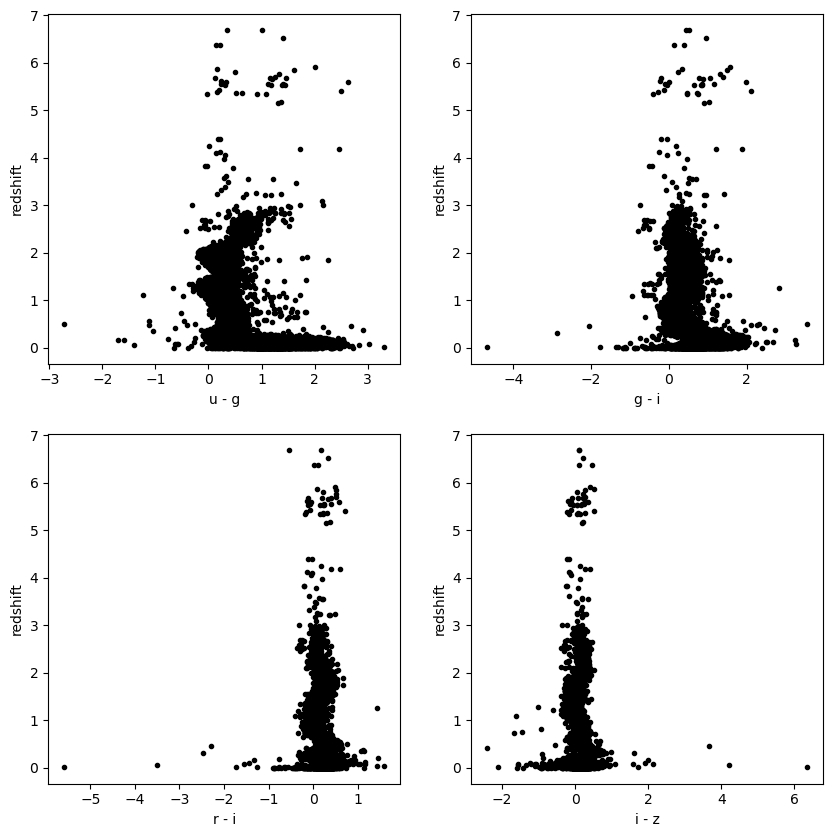

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

# Plot of the color indices u-g, g-i, r-i and i-z vs redshift
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].scatter(data['u']-data['g'], data['redshift'], color='black', marker='.')
ax[0,1].scatter(data['g']-data['i'], data['redshift'], color='black', marker='.')
ax[1,0].scatter(data['r']-data['i'], data['redshift'], color='black', marker='.')
ax[1,1].scatter(data['i']-data['z'], data['redshift'], color='black', marker='.')
ax[0,0].set_ylabel(r'redshift')
ax[0,0].set_xlabel(r'u - g')
ax[0,1].set_ylabel(r'redshift')
ax[0,1].set_xlabel(r'g - i')
ax[1,0].set_ylabel(r'redshift')
ax[1,0].set_xlabel(r'r - i')
ax[1,1].set_ylabel(r'redshift')
ax[1,1].set_xlabel(r'i - z')
plt.show()

From these plots, it vcan be seen that there is not a clear relation between redshift and color indices. In  particular, we cannot expect a linear realtion between these variables.

Therefore , we will explore other types of possible relation. For example, we may try a multivariate non-linear dependence. Thus, we plot the behavior of redshift vs. two color indices using a color map and the function [matplotlib.pyplot.scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) with the arguments `s`, `c` y `cmap`. 

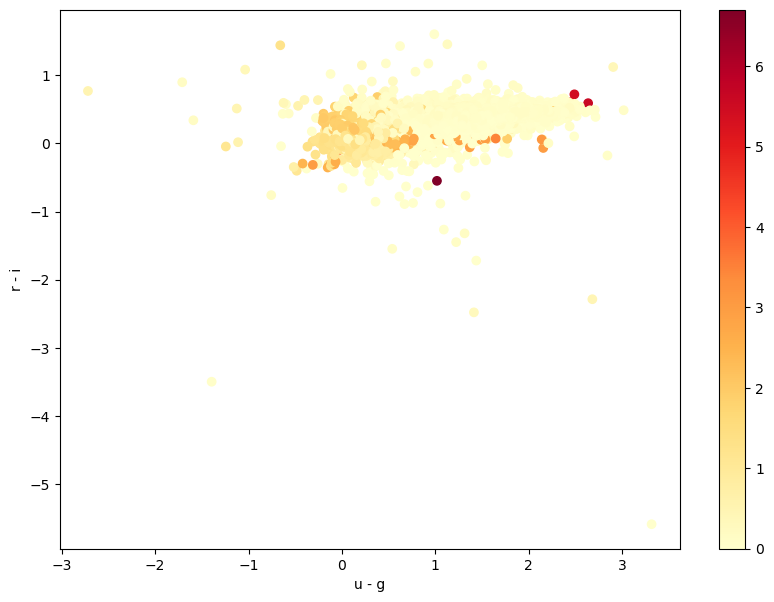

In [10]:
# Color gradient plot representign redshift
# vs. the color indices u-g and r-i

# Recommended colour map
cmap1 = plt.get_cmap('YlOrRd')
plt.figure(figsize=(10,7))
plt.scatter(data['u']-data['g'],data['r']-data['i'], c=data['redshift'], cmap=cmap1)
plt.ylabel(r'r - i')
plt.xlabel(r'u - g')
plt.colorbar()
plt.show()

From this figure is possible to identify some regions (reasonable well defined) where the redshift has similar values. Hence, we may expect to define some 'contours' to estimate the redshift in this diagram, but the uncertainty in these estimations may be high.

---
### Decision Trees 

**Decision Trees**  are a ML tool that may be used for **classification** and **regression** tasks. In this kind of algorithm, a set of features are mapped into a set of targets. The training of the algorithm is obtained by defining a series of individual decisions represented by nodes (bifurcation) in a tree structure. Each decision uses one (and only one) of the features and the end point of every branch is one of the targets.

An example of this type of structure is seen in the paper: 

E. C. Vasconcellos et al. *Decision Tree Clasifiers for Star/Galaxy separation*. AJ 141, 189 (2011).



<center>
<img src="https://cdn.iopscience.com/images/1538-3881/141/6/189/Full/aj385906f1_lr.jpg">
</center>

Las decisiones en cada rama se determinan a partir de los datos de entrenamiento y por el algoritmo de los árboles de decisión. En la práctica, cada algoritmo particular emplea una **métrica** para encontrar la decisión que dividirá los datos de forma más efectiva.


---

Ahora utilizaremos los índices de color fotométricos como los datos de entrada y los objetivos (datos de salida) serán los corrimientos al rojo. El entrenamiento del algoritmo deberá dar como resultado un árbol similar al que se muestra en la siguiente figura:

<center>
<img src="https://groklearning-cdn.com/modules/5PUcnT5fqRn5wTUXw7kg2B/decisiontree_1.png" width=450>
</center>

Note that each node involves only one of the color indices. Following a particular path in the tree you will arrive to a particular target value, corresponding to the redshift of the sample.



### Prreparing the dataset

In order to train the algorithm, we will define the color indices 'u-g', 'g-i', 'r-i' and 'i-z' and use them to define an array named `'features'`. Similarly, we will define an array named `'targets'` with the redshift indformation.

In [11]:
# Function returning the 4 color indices and the redshifts

features = np.asarray([data['u']-data['g'],\
                       data['g']-data['i'],\
                       data['r']-data['i'],\
                       data['i']-data['z'] ])

targets = np.asarray(data['redshift'])

features.shape, targets.shape

((4, 50000), (50000,))

As usual with functions from the library `'scikit-learn'`, we need that the features correspond to columns. Therefore,

In [12]:
# Change the shape of the array. Features in the columns, samples in the rows.
features = features.T
features.shape

(50000, 4)

In [13]:
targets.shape

(50000,)

Now, we split these sets into train and test subsets,

In [14]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_targets, test_targets = train_test_split(features, targets, random_state=60, test_size=0.5)

In [15]:
train_features.shape

(25000, 4)

In [16]:
test_features.shape

(25000, 4)

### Decision trees in `SciKit Learn`

From the library `SciKit Learn`, we will use the function [sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html).


In [17]:
from sklearn.tree import DecisionTreeRegressor

d_tree = DecisionTreeRegressor(max_depth=10)

d_tree

DecisionTreeRegressor(max_depth=10)

Now we train the model,

In [18]:
d_tree.fit(train_features, train_targets)

DecisionTreeRegressor(max_depth=10)

Once the model is complete, we use the method `.predict()` to predict the redshift of the test samples,

In [19]:
predictions_d_tree = d_tree.predict(test_features)
predictions_d_tree

array([0.06328694, 0.10793871, 0.06648233, ..., 0.09284393, 0.09284393,
       0.08231432])

In [20]:
test_targets

array([0.03598659, 0.1229592 , 0.08316126, ..., 0.08744437, 0.1408089 ,
       0.05476268])

#### Evaluation of the model

In order to evaluate the decision tree, we will calculate the difference between predictions and targets. These differences are called **residuals** and we will find the median of these values,

$$
\text{eval_dec_tree} = \text{median}\left\lbrace \left| \text{predictions}_i - \text{targets}_i \right| \right\rbrace
$$

In [23]:
eval_d_tree = np.median((np.abs(predictions_d_tree - test_targets)))
eval_d_tree

0.025979791014667995

The obtained result of $\approx 0.03$ in the median of the residuals indicates that half of the test samples will have a prediction error of $< 0.03$ in the redshift.

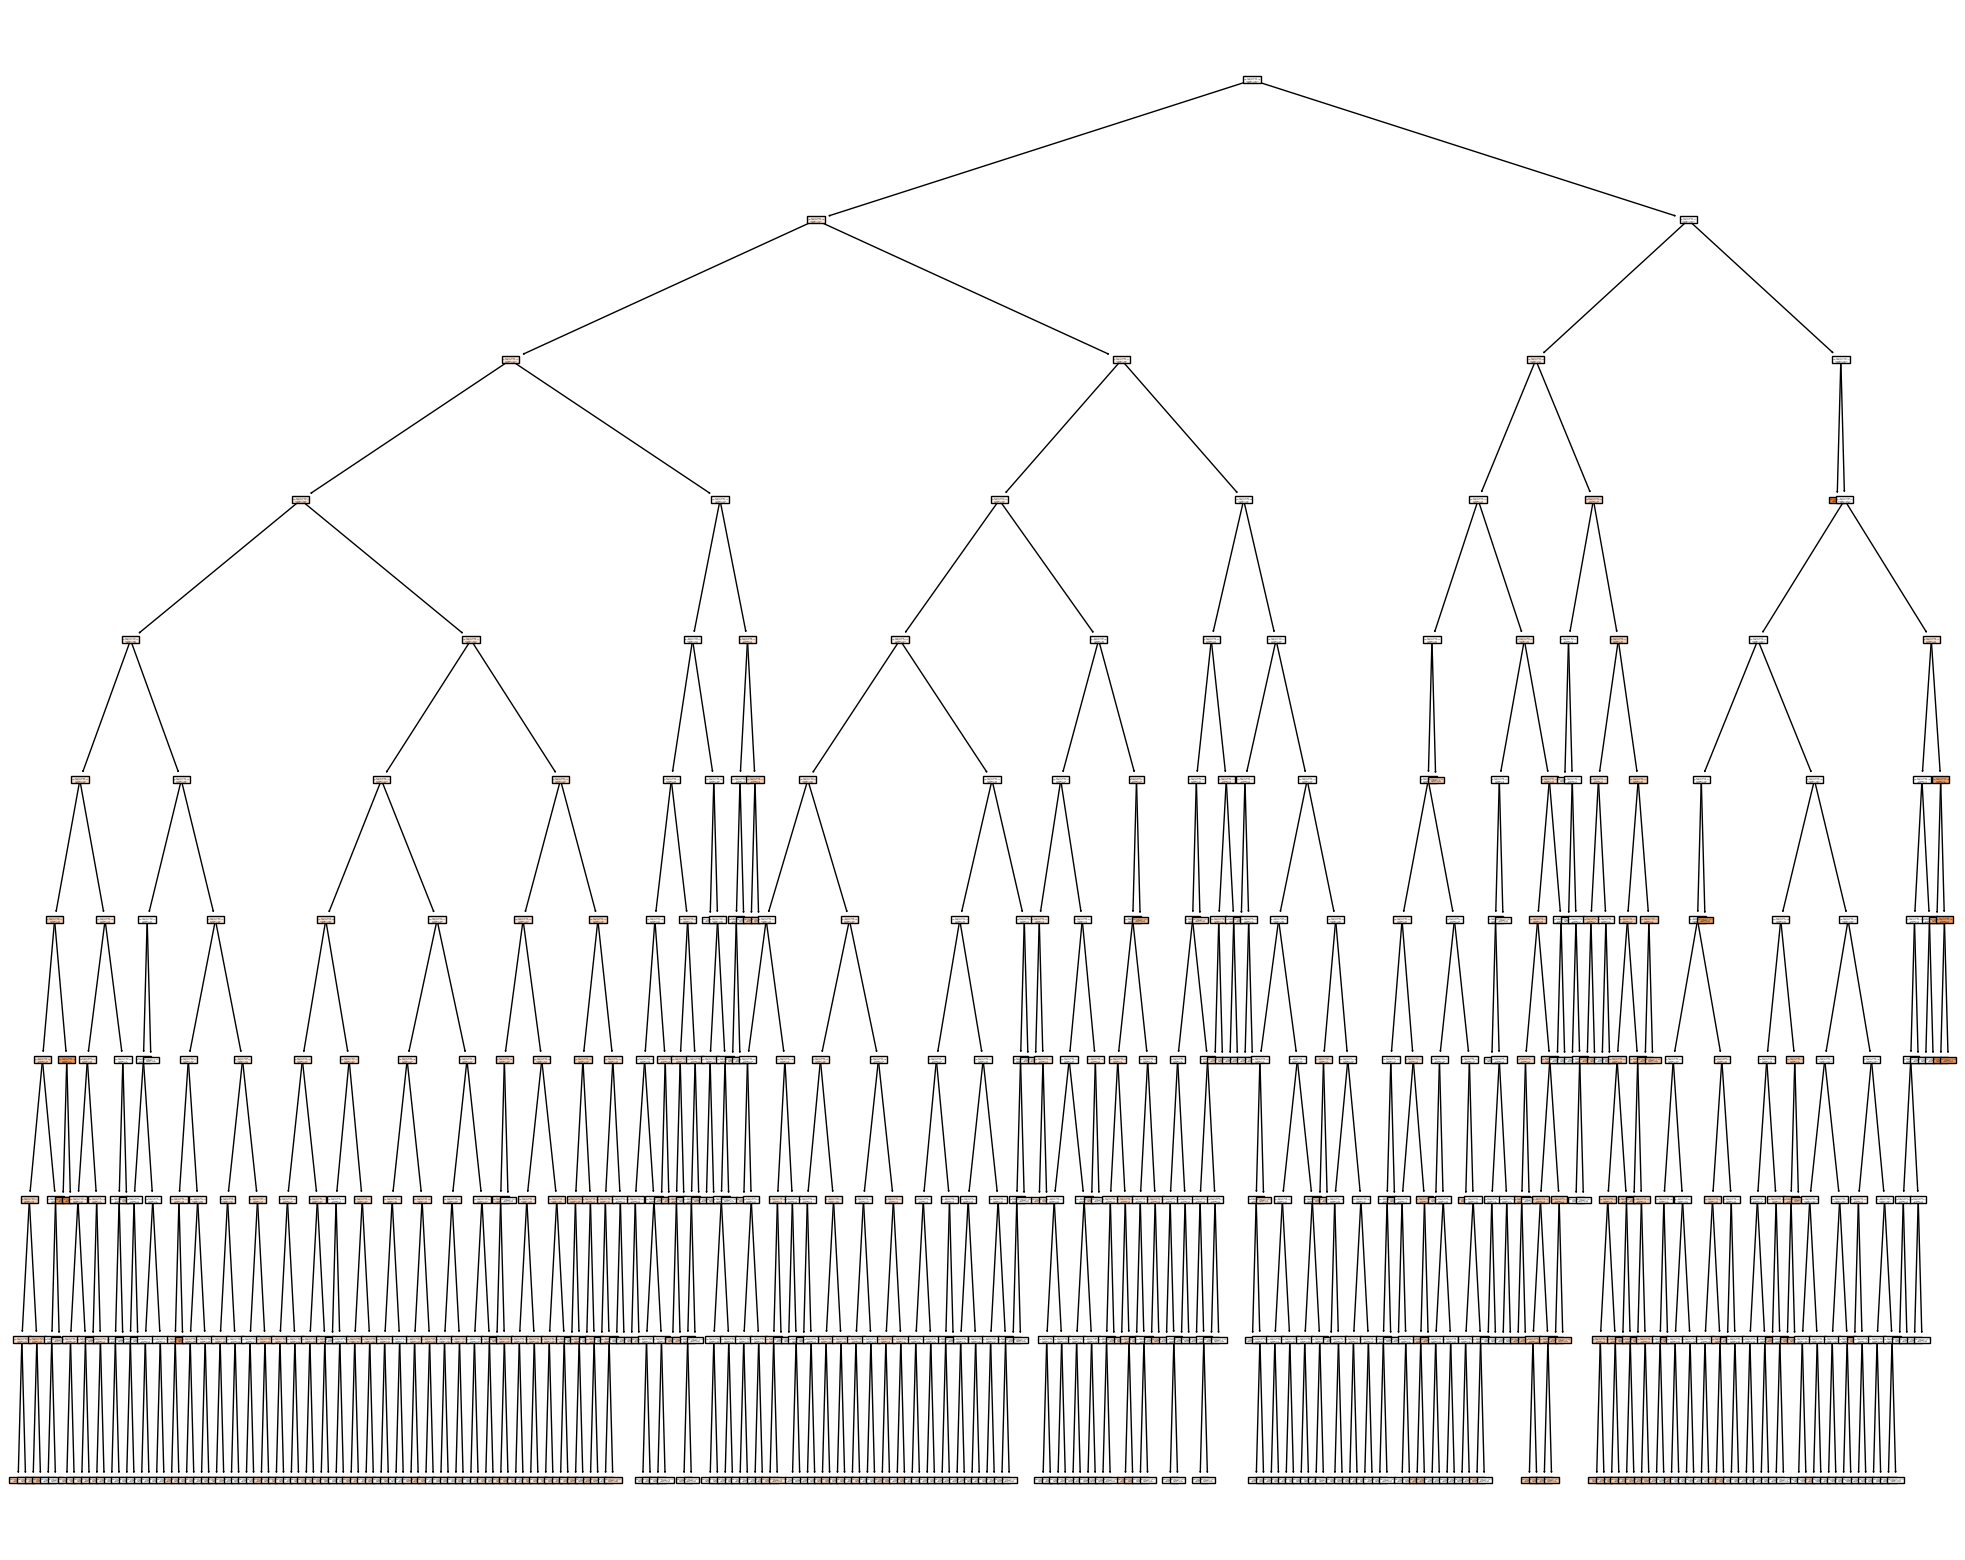

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(d_tree, filled=True)

In [25]:
d_tree = DecisionTreeRegressor(max_depth=5)
d_tree.fit(train_features, train_targets)
predictions_d_tree = d_tree.predict(test_features)
eval_d_tree = np.median(np.abs(predictions_d_tree - test_targets))
eval_d_tree

0.03682218380770237

In [26]:
feature_names = ['[u-g]','[g-i]','[r-i]','[i-z]']

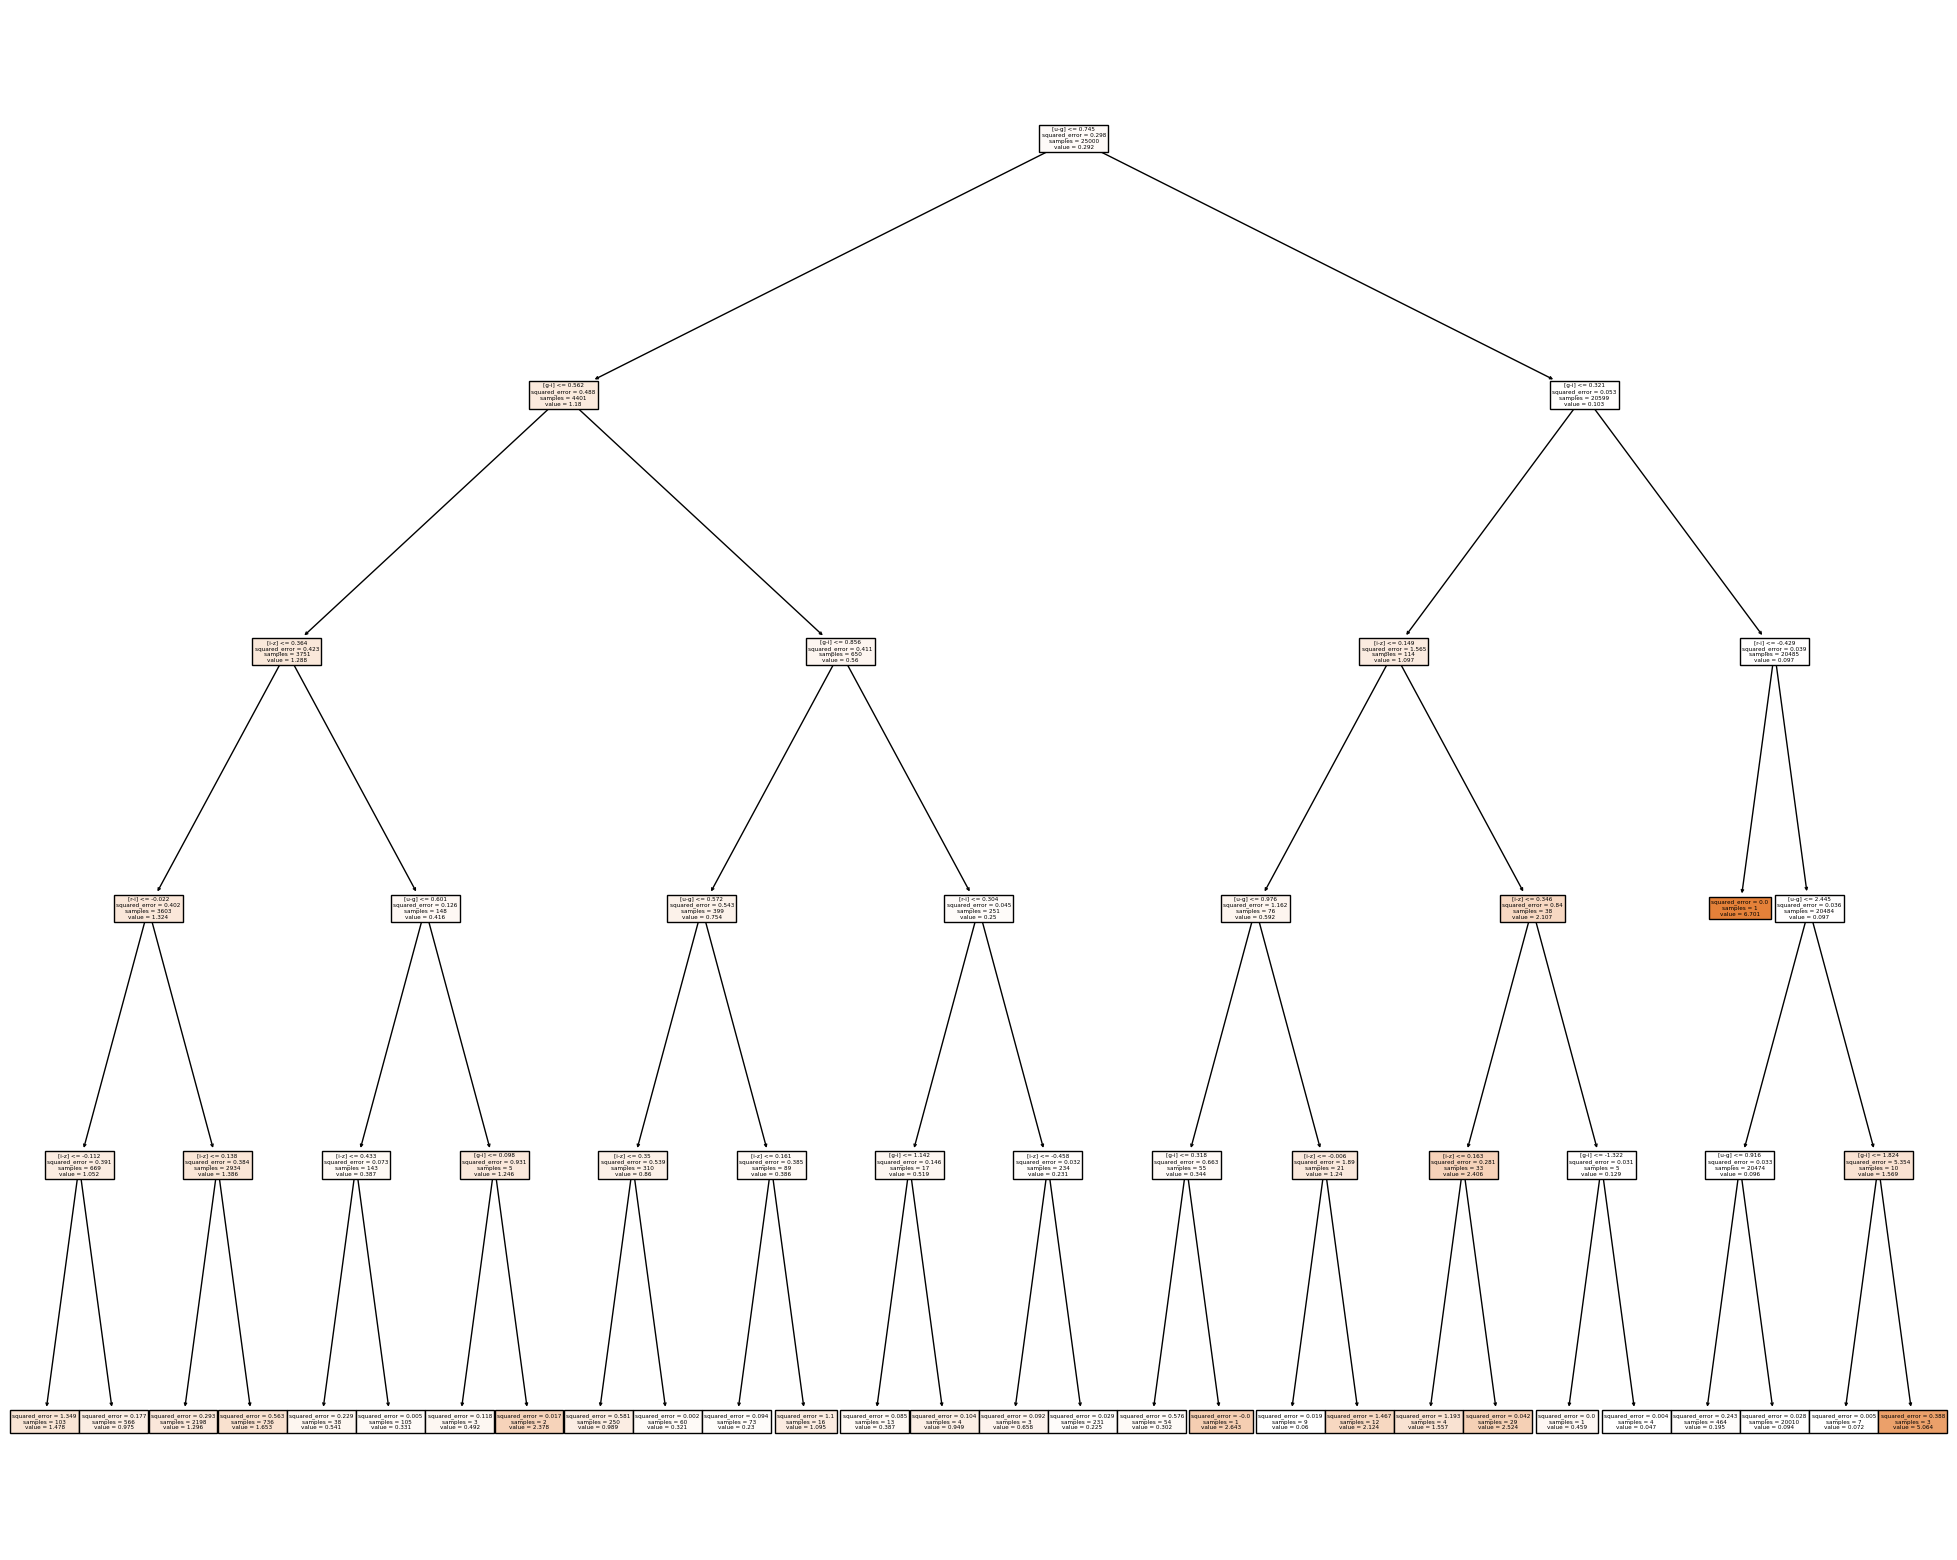

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(d_tree, feature_names=feature_names, filled=True)

In [28]:
fig.savefig("decistion_tree.pdf")